Analysis of the Monthly Revenue

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the raw data from a CSV file into a pandas DataFrame
FILE_PATH = '../../data/raw/payment.csv'
df = pd.read_csv(FILE_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   payment_id    14596 non-null  int64  
 1   customer_id   14596 non-null  int64  
 2   staff_id      14596 non-null  int64  
 3   rental_id     14596 non-null  int64  
 4   amount        14596 non-null  float64
 5   payment_date  14596 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 684.3+ KB


In [3]:
# Convert the 'payment_date' column to datetime format
df['payment_date'] = pd.to_datetime(df['payment_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   payment_id    14596 non-null  int64         
 1   customer_id   14596 non-null  int64         
 2   staff_id      14596 non-null  int64         
 3   rental_id     14596 non-null  int64         
 4   amount        14596 non-null  float64       
 5   payment_date  14596 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 684.3 KB


In [4]:
# Extract the month and year from the 'payment_date' column
df['month_year'] = df['payment_date'].dt.to_period('M')
# Group the data by month and year and calculate the total revenue for each month
monthly_revenue = df.groupby('month_year')['amount'].sum().reset_index()
# round the revenue to two decimal places
monthly_revenue['amount'] = monthly_revenue['amount'].round(2)
# Convert the 'month_year' column to a string format for better readability
monthly_revenue['month_year'] = monthly_revenue['month_year'].astype(str)


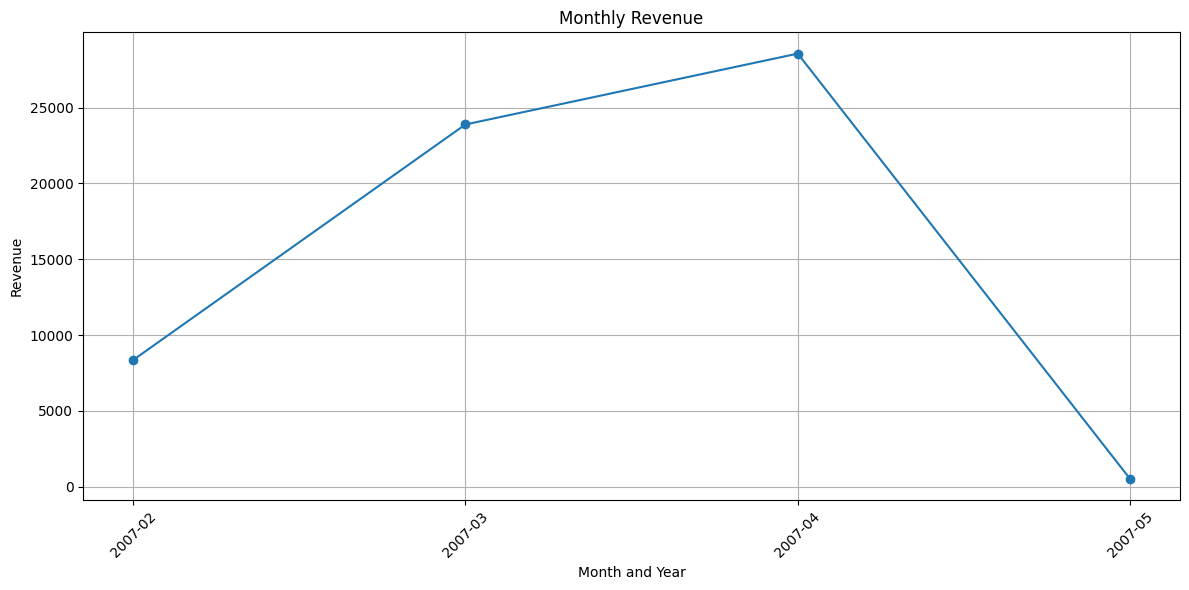

In [5]:
# Plot the monthly revenue data
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_revenue["month_year"],
    monthly_revenue["amount"],
    marker="o",
    linestyle="-",
)
plt.title("Monthly Revenue")
plt.xlabel("Month and Year")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Save the monthly revenue data to a new CSV file
OUTPUT_FILE_PATH = '../../data/processed/monthly_revenue.csv'
monthly_revenue.to_csv(OUTPUT_FILE_PATH, index=False)